# EMATM0048 - Tutorial 9B Identifying outliers

Boxplots provide a useful visualization of the distribution of your data. Typically, boxplots show the median, first quartile, third quartile, maximum datapoint, and minimum datapoint for a dataset. Many boxplots also visualize outliers, however, they don't indicate at glance which participant or datapoint is your outlier.

Let's first install and load our required packages.

In [ ]:
import pandas as pd
starwars = pd.read_csv('starwars.csv')


In humans, males are typically taller than females, but what about males and females in the Star Wars universe, which is inhabited by thousands of different species? Let's take a look in our dataset.

Let's clean up our dataset for the purposes of this demonstration by only including males and females as there's a single hermaphrodite in the dataset—it's Jabba the Hutt, if you're wondering. 

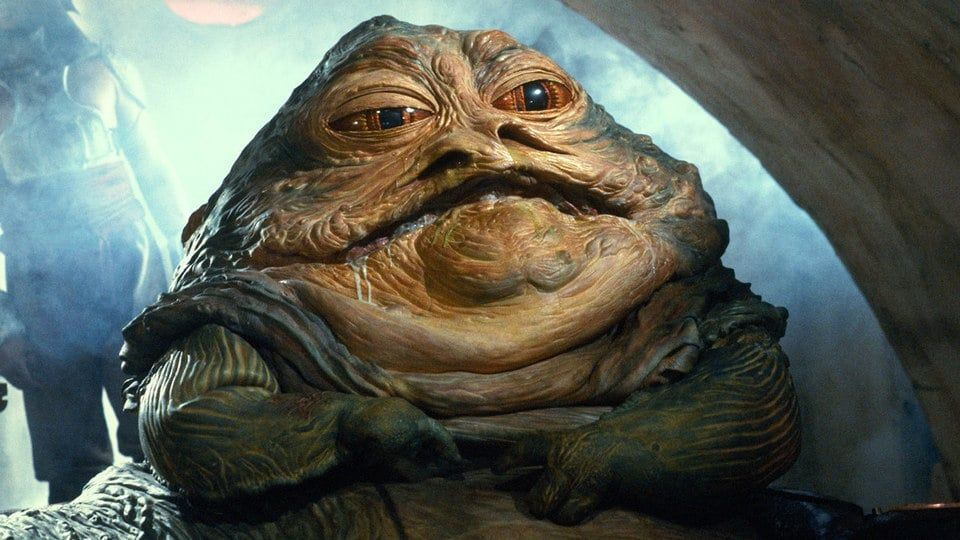

In [ ]:
starwars.columns
starwars= starwars.dropna()


In [ ]:
starwars.describe(include= 'all')

In [ ]:
starwars.gender.value_counts()

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:

plt.figure(figsize=(12, 6))
plt.title("Heigh")
plt.xlabel('Height')
plt.ylabel('Number of charachters')

plt.hist(starwars.height, bins=np.arange(min(starwars.height),max(starwars.height),5), color='purple')

In [ ]:
 #Create a new dataset that only includes males and females
values=["male","female"]
filtered_df = starwars[starwars.gender.isin(values)]
filtered_df.gender.value_counts()

In [ ]:
# Create a more interetsting boxplot 
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(filtered_df['height'])

# plt.hist(startwars.height, bins=np.arange(min(startwars.height),max(startwars.height),5), color='purple')
# boxplot(height~gender,data=starwars_mf)

In [ ]:
from matplotlib.cbook import boxplot_stats  
x= boxplot_stats(filtered_df.height).pop(0)['fliers']
print(x)

In [ ]:
male_df= filtered_df[filtered_df['gender']=="male"]
female_df= filtered_df[filtered_df['gender']=="female"]
data = [male_df['height'], female_df['height']]
 
fig = plt.figure(figsize =(8, 5))
ax = fig.add_axes([0,0,1, 1])
ax.set_xticklabels(["male", "female"])
ax.set_title('Gender boxplot')

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()


Here's our base  boxplot, which has identified outliers in the female group, and male group—but who are these outliers?
### <font color='blue'>  How many outliers in males and females? 

## 2- 3 Sigma rule: 

We will mark an outlier any observation outside 3 sd. The next code finds the values of the height that are considered as outliers.

In [ ]:
# Identify bounds
x= filtered_df['height']

higherBound= x.mean() + 3 * x.std()
lowerBound= x.mean() - 3 * x.std()
print (higherBound, lowerBound)

## Identify the rows with value greater than cutoff * sd 
cond1= filtered_df['height']>higherBound 
cond2= filtered_df['height']<lowerBound
filtered_df[cond1|cond2] #condition 1 or condition 2


# Any outliers?

### 3. Hample identifier

In [ ]:
# Identify bounds
x= filtered_df['height']

higherBound= x.mad() + 3 * x.std()
lowerBound= x.mad() - 3 * x.std()
print (higherBound, lowerBound)

## Identify the rows with value greater than cutoff * sd 
cond1= filtered_df['height']>higherBound 
cond2= filtered_df['height']<lowerBound
filtered_df[cond1|cond2] #condition 1 or condition 2


## How different is the output of these methods? Which method is better?